# Logistic Regression - Multiclass Classification


The goal of this notebook is to implement Scikit-Learn's Gradient Descent algorithm for Multi-class Logistic Regression.

There are two strategies for multi-class classification:
- One-vesus-all (OvA)
- Multinomial (Softmax)


By default Scikit-Learn’s LogisticRegression uses <strong>one-versus-all</strong> when we train it on more than two classes.

However, we can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression. 

We will investigate both strategies.

We need to specify a solver (optimization algorithm) that supports the regression. Please see the notebook **Unconstrained Optimization Algorithms-How To** for a brief introduction to the commonly used solvers.

We will use regularization (l2 regularization) in our implementation of Logistic Regression. The strength of the regularization is controlled by the hyperparameter C.

### Note on Setting Hyperparameter C

The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse C. 

The higher the value of C, the less the model is regularized.

More on Scikit-Learn's Logistic Regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# Dataset


We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png",width=800,height=400>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

## Explore The Dataset

In [2]:
iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)

#print(iris.DESCR)

dict_keys(['feature_names', 'target_names', 'filename', 'data', 'DESCR', 'target'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)


## Create Data Matrix (X) and the Label Vector (y)

We can use all features or a subset.

In [3]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

## Split Data Into Training and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Scikit-Learn LogisticRegression Attributes Settting

We need to set the following attributes to train a Logistic Regression classifier.


- penalty : ‘l1’ or ‘l2’ (default: ‘l2’). Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.


- tol : Tolerance for stopping criteria. Default 1e-4.


- C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization. Default 1.0



- solver : ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’. Algorithm to use in the optimization problem.

    -- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

    -- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

    -- ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty, whereas ‘liblinear’ and ‘saga’ handle L1 penalty.


- max_iter : Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge. Default 100


- multi_class : ‘ovr’, ‘multinomial’, ‘auto’. default: ‘ovr’. 
    -- If the option chosen is ‘ovr’, then a binary problem is fit for each label. For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. ‘multinomial’ is unavailable when solver=’liblinear’. ‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.


## Investigation of the Multi-Class Classification Techniques

Below we investigate two strategies for multi-class classification:
- One-vesus-all (OvA)
- Multinomial (Softmax)

# One-versus-All (OvA) Multi-class Classification

The OvA strategy trains multiple binary classifiers.

For the the 3 classes of the Iris dataset, OvA will trail 3 binary classifiers.

We will see that the $n\_iter\_$ attribute of the LogisticRegression object will return an array of 3 iteration counts.

## Model Selection for OvA: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [5]:
%%time
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
              'multi_class' : ['ovr'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[10000, 20000],'C': [10, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best Score (accuracy): 0.958333
Optimal Hyperparameter Values:  {'solver': 'sag', 'multi_class': 'ovr', 'max_iter': 10000, 'tol': 0.0001, 'C': 10}
CPU times: user 5.68 s, sys: 17.3 ms, total: 5.7 s
Wall time: 5.7 s


/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Train the Optimal Logistic Regression Classifier

In [6]:
lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

## Evaluate the Optimal Classifier on Test Data

In [7]:
print("No. of Iterations:",lg_reg_clf.n_iter_ )


y_test_predicted = lg_reg_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [ 625  104 1149]

Accuracy:  1.0

Test Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Observation: OvA

We observe that the $n\_iter\_$ attribute of the LogisticRegression object returns an array of 3 iteration counts. This illustrates an important difference with the Softmax regression.

In the OvA strategy we train multiply binary classifiers. In this 3 class classification problem, the LogisticRegression object has trained 3 models.

However, in the Softmax regression we train a single model for identifying multiple classes. That's why we prefer to use Softmax regression for multi-class classification.


## Model Selection for Softmax Regression: Hyperparameter Tuning

First, we need to find the optimal hyperparameters via Gridsearch.

In [8]:
%%time
param_grid_sm = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[10000, 20000],'C': [10, 50]}

lg_reg_sm = LogisticRegression()

lg_reg_sm_cv = GridSearchCV(lg_reg_sm, param_grid_sm, scoring='accuracy', cv=3)
lg_reg_sm_cv.fit(X_train, y_train)

params_optimal_sm = lg_reg_sm_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_sm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sm)

Best Score (accuracy): 0.958333
Optimal Hyperparameter Values:  {'solver': 'newton-cg', 'multi_class': 'multinomial', 'max_iter': 10000, 'tol': 0.001, 'C': 10}
CPU times: user 5.29 s, sys: 8.48 ms, total: 5.3 s
Wall time: 5.3 s


## Train the Optimal Softmax Logistic Regression Classifier

In [9]:
softmax_reg = LogisticRegression(**params_optimal_sm)

softmax_reg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.001, verbose=0, warm_start=False)

## Evaluate the Optimal Classifier on Test Data

In [10]:
print("No. of Iterations:", softmax_reg.n_iter_ )


y_test_predicted = softmax_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

No. of Iterations: [13]

Accuracy:  1.0

Test Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Plot of Class Decision Boundaries

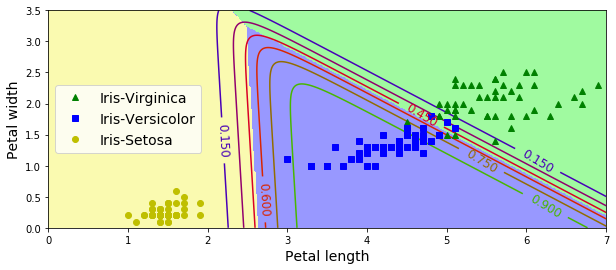

In [11]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

## Observation 

The above figure shows the resulting decision boundaries, represented by the background colors. 

Notice that the <strong><font color=red size=6>decision boundaries between any two classes are linear</font></strong>. 

The figure also shows the probabilities for the Iris-Versicolor class, represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary). 

Notice that the model can predict a class that has an estimated probability below 50%. For example, at the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.